In [125]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import time

In [126]:
DIRECTORY = r'sample_data/'
CATEGORIES = ['cats','dogs']

In [127]:
IMG_SIZE = 200

data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        data.append([img_arr, label])

In [128]:
len(data)

3933

In [129]:
random.shuffle(data)

In [130]:
x = []
y = []

for features, labels in data:
    x.append(features)
    y.append(labels)

In [131]:
x = np.array(x)
y = np.array(y)

In [132]:
pickle.dump(x, open('x.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

In [133]:
x = pickle.load(open('x.pkl', 'rb'))
y = pickle.load(open('y.pkl', 'rb'))

In [134]:
x.shape

(3933, 200, 200, 3)

In [135]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [136]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu' ))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu' ))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = x.shape[1:], activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))

In [137]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [138]:
model.fit(x, y, epochs=2, validation_split=0.1)

Epoch 1/2
111/111 ━━━━━━━━━━━━━━━━━━━━ 475s 4s/step - accuracy: 0.7680 - loss: 259.7562 - val_accuracy: 0.7817 - val_loss: 0.5340
Epoch 2/2
111/111 ━━━━━━━━━━━━━━━━━━━━ 503s 4s/step - accuracy: 0.8136 - loss: 0.4638 - val_accuracy: 0.7817 - val_loss: 0.5799


In [147]:
model.save('sample_data/my_model.keras')

In [140]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

In [148]:
# Define paths
MODEL_PATH = "sample_data/my_model.keras"  # Replace with your model's path
IMAGE_FOLDER = "sample_data/test1/"  # Replace with the folder containing test images
TARGET_SIZE = (200, 200)  # Replace with the input size required by your model
OUTPUT_FOLDER = "sample_data/infrance"  # Folder to save results, optional

# Load the model
model = load_model(MODEL_PATH)
print("Model loaded successfully.")

Model loaded successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [149]:
# Ensure the output folder exists
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# Function to preprocess an image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load image: {image_path}")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, TARGET_SIZE)  # Resize to the target size
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

In [150]:
# Function to perform inference
def run_inference(image_folder):
    results = []
    for file_name in os.listdir(image_folder):
        image_path = os.path.join(image_folder, file_name)

        if not os.path.isfile(image_path):
            print(f"Skipping non-file: {file_name}")
            continue

        # Preprocess the image
        preprocessed_img = preprocess_image(image_path)
        if preprocessed_img is None:
            continue

            # Perform inference
        prediction = model.predict(preprocessed_img)
        print(f"Prediction for {file_name}: {prediction}")

        # Append results
        results.append((file_name, prediction))

        # Optional: Save processed images or results
        output_image_path = os.path.join(OUTPUT_FOLDER, file_name)
        cv2.imwrite(output_image_path, cv2.imread(image_path))  # Save original or annotated image

    return results

In [152]:
# Run inference on all images in the folder
results = run_inference(IMAGE_FOLDER)

# Display results
for file_name, prediction in results:
    print(f"{file_name}: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Prediction for image5.jpg: [[0.796107   0.20389307]]
Skipping non-file: .ipynb_checkpoints
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction for image1.jpg: [[0.7961857  0.20381434]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction for image3.jpg: [[0.796107   0.20389307]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Prediction for image4.jpg: [[0.796107   0.20389307]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Prediction for image2.jpg: [[0.79606074 0.20393924]]
image5.jpg: [[0.796107   0.20389307]]
image1.jpg: [[0.7961857  0.20381434]]
image3.jpg: [[0.796107   0.20389307]]
image4.jpg: [[0.796107   0.20389307]]
image2.jpg: [[0.79606074 0.20393924]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction for image5.jpg: [[0.796107   0.20389307]]
Skipping non-file: .ipynb_checkpoints
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Prediction for image1.jpg: [[0.7961857  0.20381434]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction for image3.jpg: [[0.796107   0.20389307]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediction for image4.jpg: [[0.796107   0.20389307]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Prediction for image2.jpg: [[0.79606074 0.20393924]]


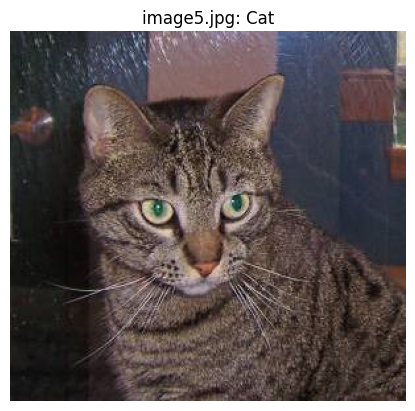

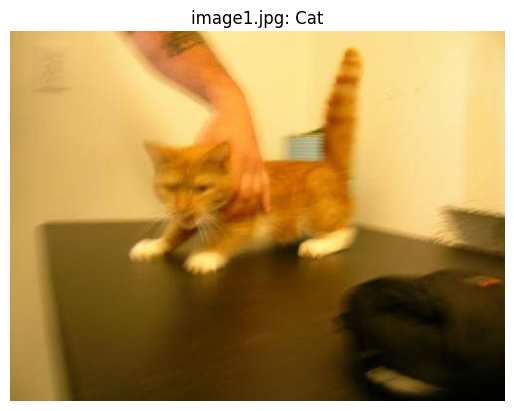

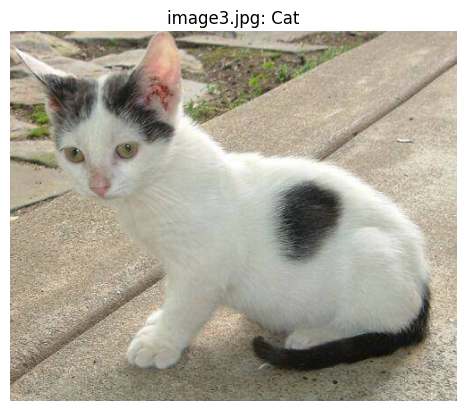

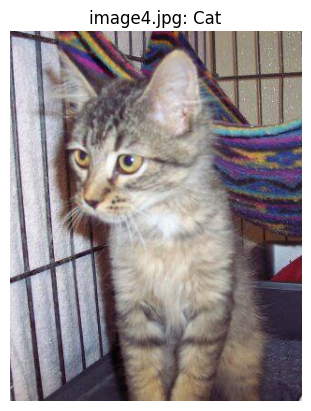

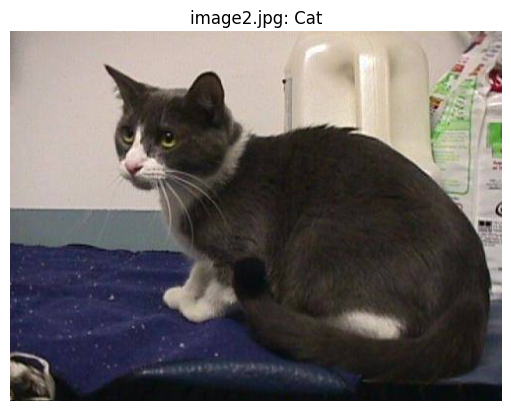

In [153]:
# Run inference on all images in the folder
results = run_inference(IMAGE_FOLDER)

# Display results (file name, prediction, and image)
for file_name, prediction in results:
    # Assuming a binary classification (cat vs. dog)
    label = "Cat" if np.argmax(prediction) == 0 else "Dog"

    # Show the image with the predicted label
    img = cv2.imread(os.path.join(IMAGE_FOLDER, file_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display

    plt.imshow(img)
    plt.title(f"{file_name}: {label}")
    plt.axis('off')  # Turn off axis labels
    plt.show()